# 1. Creación de Escenarios y Particiones por Consulta Clínica para cada día del Set de Pruebas.

## 1.1 Importación de Librerías y Carga del Set de Pruebas heredado de la Fase 1 - Predicción de No Shows.

In [1]:
import pandas as pd
from datetime import datetime
import random

from openpyxl import Workbook
from openpyxl.styles import Alignment
from openpyxl.utils.dataframe import dataframe_to_rows

In [2]:
# Ruta del archivo CSV con los datos del Set de Pruebas
file_path = "./test_set_P1-ALL-ADASYN con Prob_No_Show_TabNet.xlsx"

# Leer el archivo EXCEL
test_set_full = pd.read_excel(file_path)

# Nos quedamos con el contenido que necesitamos: 'PatientId', 'ScheduledDay', 'AppointmentDay', 'NoShow', 'Prob_NoShow'
test_set = test_set_full[['PatientId', 'ScheduledDay', 'AppointmentDay', 'NoShow', 'Prob_NoShow']]

# Convertimos 'ScheduledDay' y 'AppointmentDay' a datetime
pd.options.mode.copy_on_write = True
test_set['ScheduledDay'] = pd.to_datetime(test_set['ScheduledDay'])
test_set['AppointmentDay'] = pd.to_datetime(test_set['AppointmentDay'])

# Mostrar el contenido del DataFrame
test_set

PatientId        ScheduledDay AppointmentDay  NoShow  Prob_NoShow
0       29151176571548 2016-03-07 07:54:22     2016-05-30    True     0.612299
1        5545211593544 2016-04-01 09:10:54     2016-05-30    True     0.633393
2       28438412943986 2016-04-01 09:14:31     2016-05-30    True     0.485438
3        8338993186939 2016-04-01 14:20:09     2016-05-30    True     0.717672
4        8965113984137 2016-04-05 15:38:53     2016-05-30    True     0.641244
...                ...                 ...            ...     ...          ...
22092  729255235141745 2016-06-08 19:32:25     2016-06-08   False     0.030953
22093  947614361749238 2016-06-08 19:32:56     2016-06-08   False     0.125537
22094     356247857784 2016-06-08 19:33:23     2016-06-08   False     0.045798
22095     234131759175 2016-06-08 19:58:52     2016-06-08   False     0.045798
22096    5237164264312 2016-06-08 20:07:23     2016-06-08   False     0.066827

[22097 rows x 5 columns]

In [3]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22097 entries, 0 to 22096
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       22097 non-null  int64         
 1   ScheduledDay    22097 non-null  datetime64[ns]
 2   AppointmentDay  22097 non-null  datetime64[ns]
 3   NoShow          22097 non-null  bool          
 4   Prob_NoShow     22097 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 712.2 KB


## 1.2 Selección de datos válidos para cálculo de costes, incluyendo la separación por 'AppointmentDay'.

Agrupamos los datos por 'AppointmentDay', revisamos proporción de NoShows, y guardamos dichos subconjuntos.

In [4]:
# Group the DataFrame by 'AppointmentDay'
grouped_data = test_set.groupby('AppointmentDay')

# Create a dictionary to store the smaller datasets
test_datasets = {}

# Iterate over each group and store the corresponding dataset in the dictionary
for day, group in grouped_data:
    test_datasets[day] = group

# Access, review and store the datasets for specific days
test_set_May30 = test_datasets[datetime(2016, 5, 30)]
print(f"El set para el 30 de mayo de 2016 tiene {test_set_May30.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_May30['NoShow'].mean():.2%}.")
print("\033[1mDescartamos los datos del 30 de mayo de 2016 por \
insuficiencia de datos y por ser todos No Show.\033[0m\n")

test_set_May31 = test_datasets[datetime(2016, 5, 31)]
print(f"El set para el 31 de mayo de 2016 tiene {test_set_May31.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_May31['NoShow'].mean():.2%}.")
print("\033[1mDescartamos los datos del 31 de mayo de 2016 porque \
el alto número de No Shows desvirtuan la programación y cálculo de los costes.\033[0m\n")

test_set_June01 = test_datasets[datetime(2016, 6, 1)]
print(f"El set para el 01 de junio de 2016 tiene {test_set_June01.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_June01['NoShow'].mean():.2%}.")

test_set_June02 = test_datasets[datetime(2016, 6, 2)]
print(f"El set para el 02 de junio de 2016 tiene {test_set_June02.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_June02['NoShow'].mean():.2%}.")
val_set_June02 = test_datasets[datetime(2016, 6, 2)]

test_set_June03 = test_datasets[datetime(2016, 6, 3)]
print(f"El set para el 03 de junio de 2016 tiene {test_set_June03.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_June03['NoShow'].mean():.2%}.")
val_set_June03 = test_datasets[datetime(2016, 6, 3)]

test_set_June06 = test_datasets[datetime(2016, 6, 6)]
print(f"El set para el 06 de junio de 2016 tiene {test_set_June06.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_June06['NoShow'].mean():.2%}.")

test_set_June07 = test_datasets[datetime(2016, 6, 7)]
print(f"El set para el 07 de junio de 2016 tiene {test_set_June07.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_June07['NoShow'].mean():.2%}.")

test_set_June08 = test_datasets[datetime(2016, 6, 8)]
print(f"El set para el 08 de junio de 2016 tiene {test_set_June08.shape[0]} citas, \
con un porcentaje de NoShows del {test_set_June08['NoShow'].mean():.2%}.")

print("\033[1mREHACEMOS TODO EL PROCESO DESCARTANDO LOS DATOS DEL 30 Y 31 DE MAYO.\033[0m\n")

El set para el 30 de mayo de 2016 tiene 60 citas, con un porcentaje de NoShows del 100.00%.
Descartamos los datos del 30 de mayo de 2016 por insuficiencia de datos y por ser todos No Show.

El set para el 31 de mayo de 2016 tiene 765 citas, con un porcentaje de NoShows del 66.80%.
Descartamos los datos del 31 de mayo de 2016 porque el alto número de No Shows desvirtuan la programación y cálculo de los costes.

El set para el 01 de junio de 2016 tiene 3061 citas, con un porcentaje de NoShows del 18.75%.
El set para el 02 de junio de 2016 tiene 3248 citas, con un porcentaje de NoShows del 18.29%.
El set para el 03 de junio de 2016 tiene 3163 citas, con un porcentaje de NoShows del 19.60%.
El set para el 06 de junio de 2016 tiene 3802 citas, con un porcentaje de NoShows del 18.73%.
El set para el 07 de junio de 2016 tiene 3884 citas, con un porcentaje de NoShows del 17.64%.
El set para el 08 de junio de 2016 tiene 4114 citas, con un porcentaje de NoShows del 17.14%.
REHACEMOS TODO EL PROC

In [5]:
# Quitamos las citas del 30 y 31 de mayo.
new_test_set = test_set[~test_set['AppointmentDay'].dt.strftime('%Y-%m-%d').isin(['2016-05-30', '2016-05-31'])]

print(new_test_set[new_test_set['AppointmentDay'] == datetime(2016, 5, 30)])
print(new_test_set[new_test_set['AppointmentDay'] == datetime(2016, 5, 31)])

Empty DataFrame
Columns: [PatientId, ScheduledDay, AppointmentDay, NoShow, Prob_NoShow]
Index: []
Empty DataFrame
Columns: [PatientId, ScheduledDay, AppointmentDay, NoShow, Prob_NoShow]
Index: []


In [6]:
# Quitamos las citas solicitadas para el mismo día del appointment.
new_test_set = new_test_set[new_test_set['ScheduledDay'].dt.strftime('%Y-%m-%d') != new_test_set['AppointmentDay'].dt.strftime('%Y-%m-%d')]

new_test_set

PatientId        ScheduledDay AppointmentDay  NoShow  Prob_NoShow
825     79816568214259 2015-12-08 14:41:08     2016-06-01    True     0.454570
826       529431463548 2015-12-08 14:42:31     2016-06-01    True     0.418943
827       652678625731 2015-12-08 14:43:14     2016-06-01   False     0.403489
828      3624378872786 2015-12-08 14:43:34     2016-06-01    True     0.380011
829    939919265925899 2015-12-08 14:43:52     2016-06-01    True     0.392757
...                ...                 ...            ...     ...          ...
20728    1957317441772 2016-06-07 18:35:36     2016-06-08   False     0.590582
20729   77213369861559 2016-06-07 18:52:29     2016-06-08   False     0.816563
20730    6413391347676 2016-06-07 18:58:48     2016-06-08   False     0.578954
20731   75838484541313 2016-06-07 19:01:01     2016-06-08   False     0.740746
20732   36657393652886 2016-06-07 19:03:57     2016-06-08   False     0.685905

[14154 rows x 5 columns]

In [7]:
new_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14154 entries, 825 to 20732
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       14154 non-null  int64         
 1   ScheduledDay    14154 non-null  datetime64[ns]
 2   AppointmentDay  14154 non-null  datetime64[ns]
 3   NoShow          14154 non-null  bool          
 4   Prob_NoShow     14154 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 566.7 KB


In [8]:
# Group the DataFrame by 'AppointmentDay'
grouped_test_data = new_test_set.groupby('AppointmentDay')

# Create a dictionary to store the smaller datasets
test_datasets = {}

# Iterate over each group and store the corresponding dataset in the dictionary
for day, group in grouped_test_data:
    test_datasets[day] = group

# Access, review and store the datasets for specific days
test_set_June01 = test_datasets[datetime(2016, 6, 1)]
print(f"El set con todas las citas médicas para el 1 de junio de 2016 tiene \
{test_set_June01.shape[0]} citas, con un porcentaje de NoShows del \
{test_set_June01['NoShow'].mean():.2%}.")

test_set_June02 = test_datasets[datetime(2016, 6, 2)]
print(f"El set con todas las citas médicas para el 2 de junio de 2016 tiene \
{test_set_June02.shape[0]} citas, con un porcentaje de NoShows del \
{test_set_June02['NoShow'].mean():.2%}.")

test_set_June03 = test_datasets[datetime(2016, 6, 3)]
print(f"El set con todas las citas médicas para el 3 de junio de 2016 tiene \
{test_set_June03.shape[0]} citas, con un porcentaje de NoShows del \
{test_set_June03['NoShow'].mean():.2%}.")

test_set_June06 = test_datasets[datetime(2016, 6, 6)]
print(f"El set con todas las citas médicas para el 6 de junio de 2016 tiene \
{test_set_June06.shape[0]} citas, con un porcentaje de NoShows del \
{test_set_June06['NoShow'].mean():.2%}.")

test_set_June07 = test_datasets[datetime(2016, 6, 7)]
print(f"El set con todas las citas médicas para el 7 de junio de 2016 tiene \
{test_set_June07.shape[0]} citas, con un porcentaje de NoShows del \
{test_set_June07['NoShow'].mean():.2%}.")

test_set_June08 = test_datasets[datetime(2016, 6, 8)]
print(f"El set con todas las citas médicas para el 8 de junio de 2016 tiene \
{test_set_June08.shape[0]} citas, con un porcentaje de NoShows del \
{test_set_June08['NoShow'].mean():.2%}.")

El set con todas las citas médicas para el 1 de junio de 2016 tiene 2088 citas, con un porcentaje de NoShows del 26.68%.
El set con todas las citas médicas para el 2 de junio de 2016 tiene 2147 citas, con un porcentaje de NoShows del 26.22%.
El set con todas las citas médicas para el 3 de junio de 2016 tiene 2105 citas, con un porcentaje de NoShows del 27.27%.
El set con todas las citas médicas para el 6 de junio de 2016 tiene 2522 citas, con un porcentaje de NoShows del 27.12%.
El set con todas las citas médicas para el 7 de junio de 2016 tiene 2542 citas, con un porcentaje de NoShows del 25.26%.
El set con todas las citas médicas para el 8 de junio de 2016 tiene 2750 citas, con un porcentaje de NoShows del 23.64%.


# 2. Cálculo de Costes

## 2.1 Regla de Asignación de Cita
### **Por Probabilidades de Asistencia**

Al primer paciente que pide una cita para un determinado día se le asigna al primer slot de la primera consulta, y se guarda también su probabilidad de asistencia.

Cuando un nuevo paciente solicita cita para el mismo día, se revisa slot por slot, y se le coloca en el primer slot donde la suma de las probabilidades de asistencia de todos los pacientes asignados a dicho slot, incluido este último, sea menor de un porcentaje determinado.

Si no "cabe" en ningún slot, se "abre" otra consulta.

In [73]:
def calculo_liston_ProbShow(x_values, y_values, x4: int) -> float:
    '''
    Calcula la coordenada y4 de una función cuadrática para una coordenada x4 dada,
    usando 3 puntos (Interpolación polinómica de Lagrange)
    Parámetros:
        x_values: Lista de 3 coordenadas x de los 3 puntos conocidos.
        y_values: Lista de 3 coordenadas y de los 3 puntos conocidos.
        x4: La coordenada para la cual se desea calcular la coordenada y4 función cuadrática.
    Retorna:
        float: La coordenada y4 correspondiente en la función cuadrática definida por 3 puntos.
    '''
    n = len(x_values)
    y4 = 0.0

    for i in range(n):
        # Calcula el polinomio L_i(x4)
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x4 - x_values[j]) / (x_values[i] - x_values[j])
        
        # Añade el término correspondiente a y_i
        y4 += y_values[i] * L_i

    return y4

def asignar_paciente_ProbShow(agenda_medica: dict, paciente_id: str, fecha: datetime.date, prob_show: float):
    '''
    Asigna un paciente a un slot de consulta en una agenda médica según la probabilidad de asistencia (prob_show).
    
    Parámetros:
    -----------
    agenda_medica : dict = Diccionario que representa la agenda médica. La estructura esperada es:
        {
            fecha: {
                consulta_key: {
                    slot_key: [(paciente_id, prob_show), ...],
                    ...
                },
                ...
            },
            ...
        }
    paciente_id : str = Identificador único del paciente.
    fecha : datetime.date = Fecha en la que se desea asignar el paciente.
    prob_show : float = Probabilidad de que el paciente se presente a la cita (0.0 <= prob_show <= 1.0).
    
    Retorno:
    --------
    dict = La agenda médica actualizada con el paciente asignado a un slot apropiado.

    Detalles:
    ---------
    - La función intenta asignar el paciente a un slot existente en la consulta en la fecha dada.
    - Cada slot puede tener un máximo de 3 pacientes.
    - La asignación se basa en un umbral calculado de probabilidad de asistencia (`liston_ProbShow`), que varía según el slot.
    - Si no hay slots disponibles que cumplan con las condiciones, se crea un nuevo slot en una consulta existente.
    - Si todas las consultas tienen 24 slots, se crea una nueva consulta con un nuevo slot para el paciente.
    '''

    paciente_sin_asignar = True

    while paciente_sin_asignar:
        asignado = False

        # Iteramos sobre consultas y slots para asignar el paciente
        for consulta_key, slots in agenda_medica[fecha].items():
            for slot_idx, (slot_key, pacientes) in enumerate(slots.items(), start=1):
                suma_prob_show = sum(paciente[1] for paciente in pacientes)
                
                # Calculamos el listón de ProbShow que tenemos fijado como condición de contorno
                # print(f'Slot_idx = {slot_idx}')
                if slot_idx in range(1, 13):
                    liston_ProbShow = calculo_liston_ProbShow((1, 6.5, 12), (0.7, 0.35, 0.2), slot_idx)
                else:
                    liston_ProbShow = calculo_liston_ProbShow((13, 18.5, 24), (0.7, 0.35, 0.2), slot_idx)
                # print(f'Liston_ProbShow = {liston_ProbShow}')

                # Verificamos si el paciente puede ser asignado al slot
                if len(pacientes) < 3 and suma_prob_show + prob_show < liston_ProbShow:
                    agenda_medica[fecha][consulta_key][slot_key].append((paciente_id, prob_show))
                    print(f'\t{fecha} {consulta_key} {slot_key}: {agenda_medica[fecha][consulta_key][slot_key]}\n')
                    asignado = True
                    break  # Salimos del bucle de slots

            if asignado:
                break  # Salimos del bucle de consultas

        if asignado:
            paciente_sin_asignar = False  # Rompemos el while_condition
        else:
            # Si no se pudo asignar el paciente a ningún slot existente, abrimos un nuevo slot en una consulta existente
            for consulta_key, slots in agenda_medica[fecha].items():
                if len(slots) < 24:
                    num_slot = len(slots) + 1
                    slot_key = f'slot_{num_slot:02d}'
                    agenda_medica[fecha][consulta_key][slot_key] = []
                    print(f'Abrimos {slot_key} en {consulta_key} para el {fecha}.\n')
                    agenda_medica[fecha][consulta_key][slot_key].append((paciente_id, prob_show))
                    print(f'\t{fecha} {consulta_key} {slot_key}: {agenda_medica[fecha][consulta_key][slot_key]}\n')
                    paciente_sin_asignar = False  # Rompemos el while_condition
                    break  # Salimos del bucle de consultas

            if paciente_sin_asignar:
                # Si no hemos podido asignar (porque todas las consultas están a tope), abre una nueva consulta y un nuevo slot
                num_consulta = len(agenda_medica[fecha]) + 1
                consulta_key = f'consulta_{num_consulta:03d}'
                agenda_medica[fecha][consulta_key] = {}
                print(f'Abrimos {consulta_key} para el {fecha}.')
                agenda_medica[fecha][consulta_key]['slot_01'] = []
                print(f'Abrimos slot_01 en {consulta_key} para el {fecha}.\n')
                agenda_medica[fecha][consulta_key]['slot_01'].append((paciente_id, prob_show))
                print(f'\t{fecha} {consulta_key} slot_01: {agenda_medica[fecha][consulta_key]["slot_01"]}\n')
                paciente_sin_asignar = False  # Rompemos el while_condition

    return agenda_medica

In [74]:
final_total_test_set = new_test_set.sort_values('ScheduledDay')

agenda_medica_ProbShow = {}

for cita in final_total_test_set.itertuples(index=True, name='Pandas'):
    fecha_cita = cita.AppointmentDay.date()
    prob_show = 1 - cita.Prob_NoShow

    if fecha_cita in agenda_medica_ProbShow.keys():
        agenda_medica_ProbShow = asignar_paciente_ProbShow(agenda_medica_ProbShow, cita.PatientId, fecha_cita, prob_show)
    else:
        agenda_medica_ProbShow[fecha_cita] = {}
        print(f'Abrimos agenda para el {fecha_cita}.')
        agenda_medica_ProbShow[fecha_cita]['consulta_001'] = {}
        print(f'Abrimos consulta_001 para el {fecha_cita}.')
        agenda_medica_ProbShow[fecha_cita]['consulta_001']['slot_01'] = []
        print(f'Abrimos slot_01 en consulta_001 para el {fecha_cita}.\n')
        agenda_medica_ProbShow[fecha_cita]['consulta_001']['slot_01'].append((cita.PatientId, prob_show))
        print(f'\t{fecha_cita} consulta_001 slot_01: {agenda_medica_ProbShow[fecha_cita]["consulta_001"]["slot_01"]}\n')

Abrimos agenda para el 2016-06-03.
Abrimos consulta_001 para el 2016-06-03.
Abrimos slot_01 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001 slot_01: [(1216586867796, 0.43599135)]

Abrimos slot_02 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001 slot_02: [(31899595421534, 0.46389024999999995)]

Abrimos slot_03 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001 slot_03: [(9582232334148, 0.60630724)]

Abrimos slot_04 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001 slot_04: [(3516253533716, 0.62872013)]

Abrimos slot_05 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001 slot_05: [(454287126844, 0.55387294)]

Abrimos slot_06 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001 slot_06: [(941625887116382, 0.60102943)]

Abrimos slot_07 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001 slot_07: [(351265918724495, 0.5669160200000001)]

Abrimos slot_08 en consulta_001 para el 2016-06-03.

	2016-06-03 consulta_001

In [75]:
# Convertirmos el diccionario agenda medica en una lista de diccionarios aplanados
agenda_medica_ProbShow_aplanada = []
for fecha_key, consultas in agenda_medica_ProbShow.items():
    for consulta_key, slots in consultas.items():
        for slot_key, pacientes in slots.items():
            for paciente_id, prob_show in pacientes:
                agenda_medica_ProbShow_aplanada.append({
                    'Fecha': fecha_key,
                    'Consulta': consulta_key,
                    'Slot': slot_key,
                    'Paciente_ID': paciente_id,
                    'Probabilidad_Show': prob_show
                })

# Creamos un DataFrame a partir de la lista de diccionarios
df_agenda_medica_ProbShow = pd.DataFrame(agenda_medica_ProbShow_aplanada)

# Ordenamos la Agenda Médica por Fecha, Número de Consulta y Número de Slot
df_agenda_medica_ProbShow = df_agenda_medica_ProbShow.sort_values(by=['Fecha', 'Consulta', 'Slot'], ascending=[True, True, True])

# Guardar la Agenda Médica en archivo Excel
file = 'Agenda Medica ProbShow.xlsx'
df_agenda_medica_ProbShow.to_excel(file, index=False)
print(f'Se ha guardado la Agenda Médica en el archivo "{file}".')

Se ha guardado la Agenda Médica en el archivo "Agenda Medica ProbShow.xlsx".


In [76]:
df_agenda_medica_ProbShow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14154 entries, 2105 to 6942
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha              14154 non-null  object 
 1   Consulta           14154 non-null  object 
 2   Slot               14154 non-null  object 
 3   Paciente_ID        14154 non-null  int64  
 4   Probabilidad_Show  14154 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 663.5+ KB


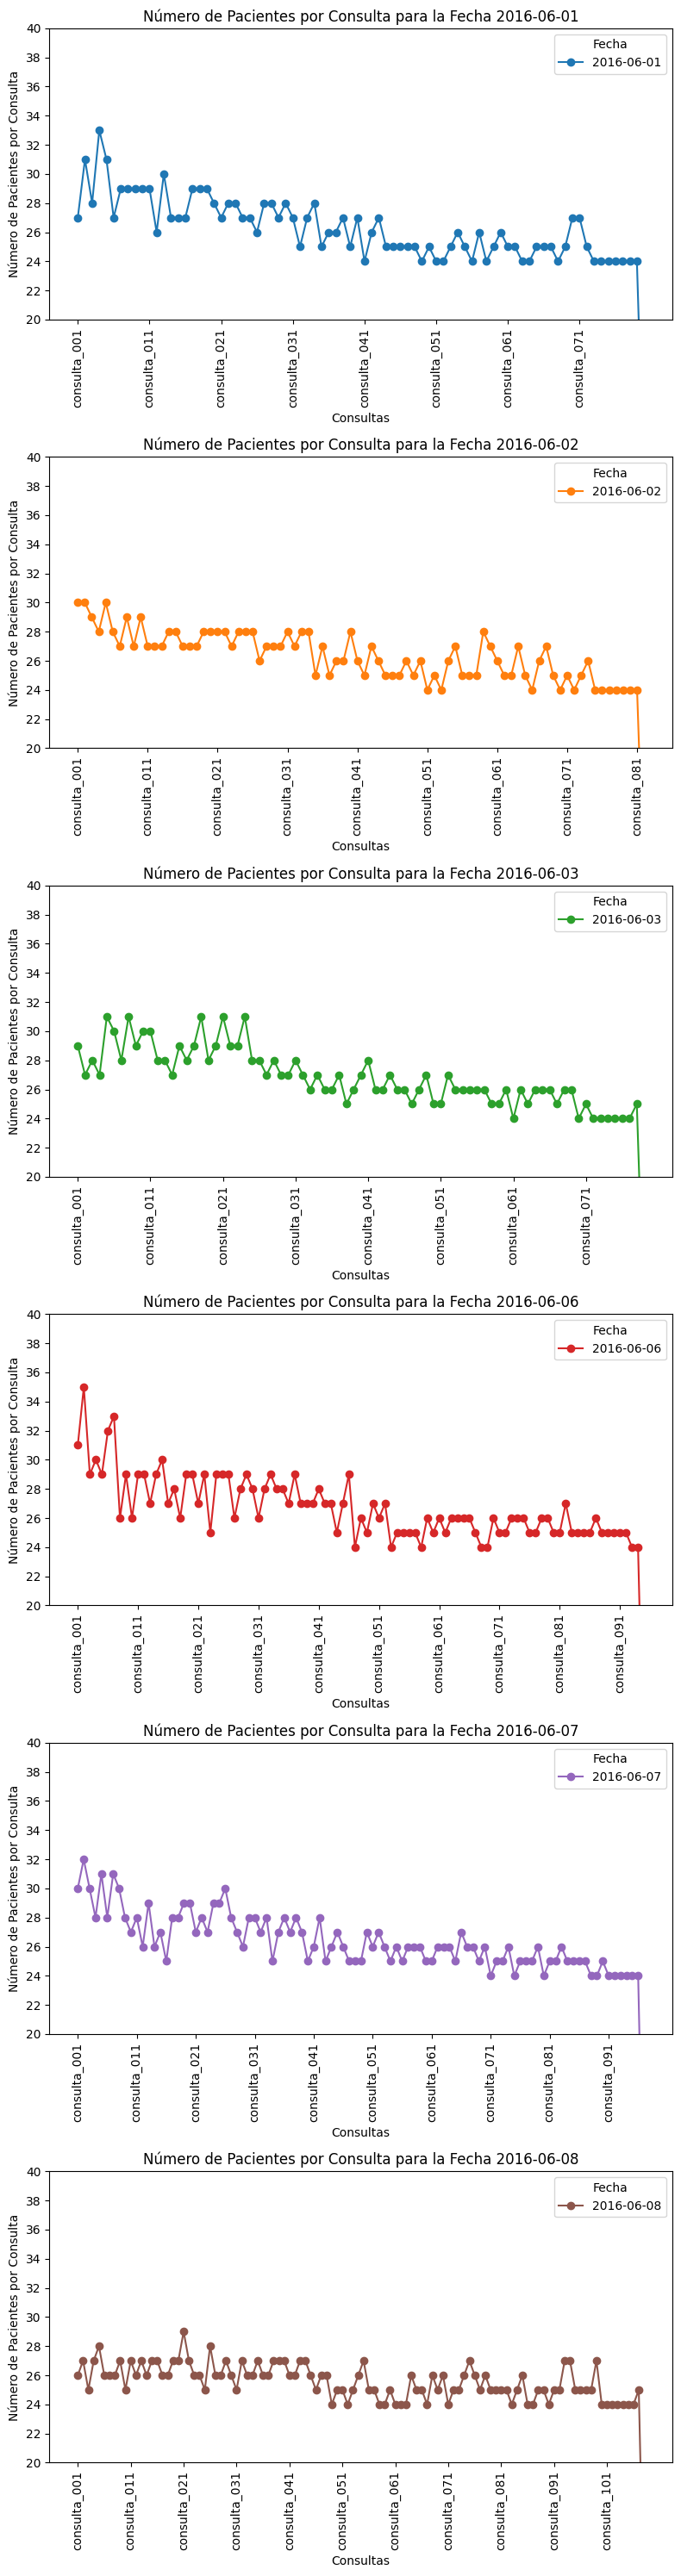

In [77]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Revisamos número de consultas por Fecha
consultas_por_fecha = []
for fecha in agenda_medica_ProbShow.keys():
    consultas_por_fecha.append({
        'Fecha': fecha,
        'Número Consultas': len(agenda_medica_ProbShow[fecha])
})

df_consultas_por_fecha = pd.DataFrame(consultas_por_fecha)

# Revisamos número de pacientes por Consulta
pacientes_por_consulta = []
for fecha_key, consultas in agenda_medica_ProbShow.items():
    for consulta_key, slots in consultas.items():
        num_pacientes_por_consulta = 0
        for pacientes in slots.values(): 
            num_pacientes_por_consulta += len(pacientes)
        pacientes_por_consulta.append({
            'Fecha': fecha_key,
            'Consulta': consulta_key,
            'Número Pacientes': num_pacientes_por_consulta
        })

df_pacientes_por_consulta = pd.DataFrame(pacientes_por_consulta)
df_pacientes_por_consulta = df_pacientes_por_consulta.sort_values(by=['Fecha','Consulta'], ascending=[True, True])

# Paleta de colores
colors = list(mcolors.TABLEAU_COLORS.values())

# Creación de una gráfica por cada fecha
fechas = df_pacientes_por_consulta['Fecha'].unique()
num_fechas = len(fechas)

plt.figure(figsize=(8, 5 * num_fechas))

for i, fecha in enumerate(fechas):
    df_fecha = df_pacientes_por_consulta[df_pacientes_por_consulta['Fecha'] == fecha]
    
    plt.subplot(num_fechas, 1, i + 1)
    plt.plot(
        df_fecha['Consulta'],
        df_fecha['Número Pacientes'],
        marker='o',
        color=colors[i % len(colors)],
        label=fecha
    )

    plt.xlabel('Consultas')
    plt.ylabel('Número de Pacientes por Consulta')
    plt.title(f'Número de Pacientes por Consulta para la Fecha {fecha}')
    plt.legend(title='Fecha')
    plt.xticks(ticks=range(0, len(df_fecha['Consulta']), 10), rotation=90)
    plt.yticks(ticks=range(0,41,2))
    plt.ylim(bottom=20)
    plt.tight_layout()

plt.show()

In [78]:
# Calculamos la media de pacientes por consulta para cada fecha
df_media_pacientes_por_consulta = df_pacientes_por_consulta.groupby('Fecha')['Número Pacientes'].mean().reset_index()
df_media_pacientes_por_consulta.columns = ['Fecha', 'Media Pacientes por Consulta']

# Añadimos los resultados al DataFrame df_consultas_por_fecha
df_consultas_por_fecha = pd.merge(
    df_consultas_por_fecha,
    df_media_pacientes_por_consulta[['Fecha', 'Media Pacientes por Consulta']], on='Fecha', how='left')

df_consultas_por_fecha

Fecha  Número Consultas  Media Pacientes por Consulta
0  2016-06-03                79                     26.645570
1  2016-06-01                80                     26.100000
2  2016-06-08               108                     25.462963
3  2016-06-06                95                     26.547368
4  2016-06-02                82                     26.182927
5  2016-06-07                97                     26.206186

### 2.2 Cálculo de Costes: Idle Time, Waiting Time y Over Time

In [51]:
def convertir_a_dict (df_agenda_medica: pd.DataFrame) -> dict:
    '''
    Convierte un DataFrame de agenda médica a un diccionario con una estructura específica.
    La estructura del diccionario resultante es la siguiente:
    {
        'Fecha': {
            'Consulta': {
                'Slot': [Paciente_IDs]
            }
        }
    }

    Args:
        df_agenda_medica (pd.DataFrame): DataFrame que contiene la agenda médica con las columnas 'Fecha', 
                                        'Consulta', 'Slot' y 'Paciente_ID'.
    Returns:
        dict: Diccionario con la estructura de agenda médica organizada por fecha, consulta y slot, 
                con listas de IDs de pacientes.
    '''
    dict_agenda_medica = {}

    for _, row in df_agenda_medica.iterrows():
        fecha = row['Fecha']
        consulta = row['Consulta']
        slot = row['Slot']
        paciente_id = row['Paciente_ID']
        
        if fecha not in dict_agenda_medica:
            dict_agenda_medica[fecha] = {}
        if consulta not in dict_agenda_medica[fecha]:
            dict_agenda_medica[fecha][consulta] = {}
        if slot not in dict_agenda_medica[fecha][consulta]:
            dict_agenda_medica[fecha][consulta][slot] = []
            
        dict_agenda_medica[fecha][consulta][slot].append(paciente_id)

    return dict_agenda_medica

def calc_exp_wc(x: int) -> float:
    '''
    Calcula la diferencia del coste exponencial de la fórmula cuadrática [ ((x)^2 + (x)) / 2 ]
    para una abscisa dada y su inmediata superior.

    Args:
        indice (int): El índice actual para el cual se quiere calcular el coste exponencial.
    Returns:
        float: El coste exponencial entre dos abscisas consecutivas.
    '''
    y_sup = ((x+1)**2 + (x+1)) / 2
    y_inf = ((x)**2 + (x)) / 2
    coste_exp = y_sup - y_inf
    return coste_exp

def calculo_costes(set:pd.DataFrame,
                    df_agenda_medica:pd.DataFrame,
                    idle_minute_cost: float,
                    waiting_minute_cost: float,
                    overtime_minute_cost: float,
                    num_consultas: int) -> list:
    '''
    Calcula los costos de inactividad, espera y tiempo extra basados en la agenda médica y
    los datos de asistencia de los pacientes.

    Parameters:
    ----------
    set : pd.DataFrame
        DataFrame que contiene información sobre los pacientes y sus citas.
        Debe tener una columna 'PatientId' y otra de 'NoShow'.
    df_agenda_medica : pd.DataFrame
        DataFrame que representa la agenda médica con los pacientes en cada slot de consulta,
        por consulta y por fecha.
    idle_minute_cost : float
        Costo por minuto de inactividad del doctor.
    waiting_minute_cost : float
        Costo por minuto de espera del paciente.
    overtime_minute_cost : float
        Costo por minuto de tiempo extra del doctor.
    num_consultas : int
        Número de consultas de la Agenda Médica a considerar para el cálculo de costos.

    Returns:
    -------
    dict
        Diccionario con los siguientes elementos:
            - 'costs': Diccionario que contiene los costos de inactividad, espera y tiempo extra
            por fecha y consulta.
            - 'average_costs': Diccionario que contiene los costos promedio de inactividad,
            espera y tiempo extra por fecha.
    '''

    # Convertimos el DataFrame en un Diccionario
    dict_agenda_medica = convertir_a_dict(df_agenda_medica)

    idle_costs = {}   # Diccionario de Costos de inactividad del doctor
    waiting_costs = {}   # Diccionario de Costos de espera del paciente
    overtime_costs = {}   # Diccionario de Costos de tiempo extra del doctor

    for fecha_key, consultas in dict_agenda_medica.items():
        idle_costs[fecha_key] = {}
        waiting_costs[fecha_key] = {}
        overtime_costs[fecha_key] = {}

        for consulta_idx, (consulta_key, slots) in enumerate(consultas.items()):
            # Recorremos el bucle sólo para el primer num_consultas indicadas
            if consulta_idx >= num_consultas:
                break
            print(f'{fecha_key} {consulta_key}:')
            
            # Parámetros iniciales
            idle_cost_name = f'Idle Cost {consulta_key}'
            waiting_cost_name = f'Waiting Cost {consulta_key}'
            overtime_cost_name = f'Overtime Cost {consulta_key}'
            
            idle_costs[fecha_key][idle_cost_name] = 24   # Coste máximo, no se ha pasado ninguna consulta.
            print(f'\nIdle Cost [{fecha_key} {consulta_key}] -> {idle_costs[fecha_key][idle_cost_name]}')
            waiting_costs[fecha_key][waiting_cost_name] = 0   # Coste mínimo, nadie ha esperado.
            print(f'Waiting Cost [{fecha_key} {consulta_key}] -> {waiting_costs[fecha_key][waiting_cost_name]}')
            overtime_costs[fecha_key][overtime_cost_name] = 0   # Coste mínimo, sin trabajo extra.
            print(f'Overtime Cost [{fecha_key} {consulta_key}] -> {overtime_costs[fecha_key][overtime_cost_name]}\n')

            patients_waiting_at_13 = 0   # Pacientes esperando a medio día
            patients_waiting_at_18 = 0   # Pacientes esperanto por la tarde
            
            for slot_idx, (slot_key, pacientes) in enumerate(slots.items(), start=1):
                slot_ocupado = False   # Inicialmente
                print(f'Slot {slot_idx}')
                idx_insertion = 0
                print(f'\tIdx_insertion = {idx_insertion}')

                for paciente in pacientes:
                    print(f'\tPaciente {paciente} - Slot_ocupado = {slot_ocupado}')
                    paciente_row_index = set[set['PatientId'] == paciente].index
                    print(f"\t¿Faltó a la cita? {set.loc[paciente_row_index, 'NoShow'].any()}")
                    
                    if slot_ocupado and not set.loc[paciente_row_index, 'NoShow'].any():
                        if slot_idx == 12:
                            if patients_waiting_at_13 >= 3:
                                print(f'¡OJO! El doctor no tiene el tiempo para \
atender a este paciente {paciente} de 13:00 a 14:00.\nSe mueve al slot de las 14:00.')
                                waiting_costs[fecha_key][waiting_cost_name] += calc_exp_wc(patients_waiting_at_13 + idx_insertion)
                                print(f'Waiting Cost [{fecha_key} {consulta_key}] -> {waiting_costs[fecha_key][waiting_cost_name]}')
                                slot_name = f'slot_{slot_idx + 1:02d}'
                                slots[slot_name].insert(idx_insertion, paciente)
                                idx_insertion += 1
                                print(f'\tIdx_insertion = {idx_insertion}')
                            else:
                                overtime_costs[fecha_key][overtime_cost_name] += 1
                                print(f'Overtime Cost [{fecha_key} {consulta_key}] -> {overtime_costs[fecha_key][overtime_cost_name]}')           
                                waiting_costs[fecha_key][waiting_cost_name] += calc_exp_wc(patients_waiting_at_13)
                                print(f'Waiting Cost [{fecha_key} {consulta_key}] -> {waiting_costs[fecha_key][waiting_cost_name]}')
                                patients_waiting_at_13 += 1
                                print(f'\tPatients waiting at 13:00: {patients_waiting_at_13}')
                        elif slot_idx == 24:
                            overtime_costs[fecha_key][overtime_cost_name] += 1
                            print(f'Overtime Cost [{fecha_key} {consulta_key}] -> {overtime_costs[fecha_key][overtime_cost_name]}')
                            waiting_costs[fecha_key][waiting_cost_name] += calc_exp_wc(patients_waiting_at_18)
                            print(f'Waiting Cost [{fecha_key} {consulta_key}] -> {waiting_costs[fecha_key][waiting_cost_name]}')
                            patients_waiting_at_18 += 1
                            print(f'\tPatients waiting at 18:00: {patients_waiting_at_18}')
                        else:
                            waiting_costs[fecha_key][waiting_cost_name] += calc_exp_wc(idx_insertion)
                            print(f'Waiting Cost [{fecha_key} {consulta_key}] -> {waiting_costs[fecha_key][waiting_cost_name]}')
                            slot_name = f'slot_{slot_idx + 1:02d}'
                            slots[slot_name].insert(idx_insertion, paciente)
                            idx_insertion += 1
                            print(f'\tIdx_insertion = {idx_insertion}')
                    elif not set.loc[paciente_row_index, 'NoShow'].any():
                        slot_ocupado = True
                        idle_costs[fecha_key][idle_cost_name] -= 1
                        print(f'Idle Cost [{fecha_key} {consulta_key}] -> {idle_costs[fecha_key][idle_cost_name]}')

            
            # Monetizamos costes
            duracion_slot = 20   # 20 minutos
            idle_costs[fecha_key][idle_cost_name] *= idle_minute_cost * duracion_slot
            print(f'\nIdle Cost [{fecha_key} {consulta_key}] -> {idle_costs[fecha_key][idle_cost_name]}')
            waiting_costs[fecha_key][waiting_cost_name] *= waiting_minute_cost * duracion_slot
            print(f'Waiting Cost [{fecha_key} {consulta_key}] -> {waiting_costs[fecha_key][waiting_cost_name]}')
            overtime_costs[fecha_key][overtime_cost_name] *= overtime_minute_cost * duracion_slot
            print(f'Overtime Cost [{fecha_key} {consulta_key}] -> {overtime_costs[fecha_key][overtime_cost_name]}\n')
            

    # Calculo de promedios
    def calcular_promedio(costs):
        promedio = {}
        for fecha_key, consultas_cost in costs.items():
            promedio[fecha_key] = sum(consultas_cost.values()) / num_consultas
        return promedio

    average_idle_costs = calcular_promedio(idle_costs)
    df_average_idle_costs = pd.DataFrame(average_idle_costs, index=[0])
    print(f'La media de los Costes de Inactividad es de:')
    print(df_average_idle_costs,'\n')
    
    average_waiting_costs = calcular_promedio(waiting_costs)
    df_average_waiting_costs = pd.DataFrame(average_waiting_costs, index=[0])
    print(f'La media de los Costes de Espera de los Pacientes es de:')
    print(df_average_waiting_costs,'\n')
    
    average_overtime_costs = calcular_promedio(overtime_costs)
    df_average_overtime_costs = pd.DataFrame(average_overtime_costs, index=[0])
    print(f'La media de los Costes de Tiempo Extra de los Doctores es de:')
    print(df_average_overtime_costs,'\n')
    
    costs = {'idle_costs': idle_costs,
            'waiting_costs': waiting_costs,
            'overtime_costs': overtime_costs}
    average_costs = {'average_idle_cost': average_idle_costs,
                    'average_waiting_cost': average_waiting_costs,
                    'average_overtime_cost': average_overtime_costs}
    
    return costs, average_costs

In [52]:
# Función Crear una tabla DataFrame resumen con la media de los costes

def crear_tabla_resumen(costes:dict, media_costes:dict) -> pd.DataFrame:
    '''
    Crea una tabla resumen en forma de un DataFrame de pandas a partir de diccionarios de costes y medias de costes.
    Args:
        costes (dict): Un diccionario que contiene información de costes, con la siguiente estructura:
        media_costes (dict): Un diccionario que contiene las medias de distintos tipos de costes, con la siguiente estructura:
    Returns:
        pd.DataFrame: Un DataFrame de pandas con las siguientes columnas:
            - 'Fecha': Las fechas de los registros.
            - 'Consultas': El número de consultas (o registros de costes de inactividad) por fecha.
            - 'Idle Cost': El coste medio de inactividad por fecha.
            - 'Waiting Cost': El coste medio de espera por fecha.
            - 'Overtime Cost': El coste medio de horas extras por fecha.
    '''
    data = {
        'Fecha': [fecha for fecha in costes['idle_costs'].keys()],
        'Consultas': [
            len(costes['idle_costs'][fecha])
            for fecha in costes['idle_costs'].keys()
        ],
        'Idle Cost': [
            media_costes['average_idle_cost'][fecha]
            for fecha in media_costes['average_idle_cost'].keys()
        ],
        'Waiting Cost': [
            media_costes['average_waiting_cost'][fecha]
            for fecha in media_costes['average_waiting_cost'].keys()
        ],
        'Overtime Cost': [
            media_costes['average_overtime_cost'][fecha]
            for fecha in media_costes['average_overtime_cost'].keys()
        ]
    }
    return pd.DataFrame(data)

In [53]:
# Función Exportar el DataFrame a Excel

def exportar_tabla_resumen_a_excel(tabla: pd.DataFrame, regla: str) -> None:
    '''
    Exporta un DataFrame a un archivo de Excel con formato personalizado.

    La función toma un DataFrame y una cadena de texto que representa una Regla de Asignación de Cita.
    Crea un archivo de Excel con el DataFrame, añade un título basado en la regla,
    centra el texto de las celdas, aplica un formato numérico a ciertas columnas,
    ajusta el ancho de las columnas y guarda el archivo con un nombre basado en la regla.

    Parámetros:
    tabla (pd.DataFrame): El DataFrame a exportar.
    regla (str): Una cadena de texto que se utilizará para personalizar el nombre del archivo y el título de la hoja de cálculo.

    Retorno:
    None: La función no retorna ningún valor, pero guarda un archivo de Excel en el directorio actual.
    '''
    # Crear un nuevo workbook
    wb = Workbook()
    ws = wb.active

    # Añadir el título
    ws.merge_cells('A1:E1')
    nombre_tabla = 'Costes Promedio Hipótesis ' + regla
    ws['A1'] = nombre_tabla
    ws['A1'].alignment = Alignment(horizontal = 'center')

    # Añadir el DataFrame a la hoja de cálculo
    for r_idx, row in enumerate(dataframe_to_rows(tabla, index = False, header = True), 2):
        for c_idx, value in enumerate(row, 1):
            cell = ws.cell(row = r_idx, column = c_idx, value = value)
            cell.alignment = Alignment(horizontal='center')
            if isinstance(value, float) and c_idx > 2:
                cell.number_format = '0.00'

    # Ajustar el ancho de las columnas
    for col in ws.iter_cols(min_row = 2,
                            max_row = ws.max_row,
                            min_col = 1,
                            max_col = ws.max_column):
        max_length = 0
        column = col[0].column_letter
        for cell in col:
            if cell.coordinate in ws.merged_cells:  # no considerar celdas fusionadas
                continue
            try:
                if cell.value is not None and len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except:
                pass
        adjusted_width = (max_length + 2)
        ws.column_dimensions[column].width = adjusted_width

    # Guardar el archivo
    nombre_archivo = 'Costes_promedio_' + regla + '.xlsx'
    wb.save(nombre_archivo)

    # Mostrar mensaje de confirmación
    print(f'El DataFrame ha sido exportado exitosamente a {nombre_archivo}.')
    
    return None

In [79]:
print('\033[1mHIPÓTESIS: Regla de Asignación de Cita\n \
\t\tPor Probabilidades de Asistencia\033[0m\n')

print('Set TEST con las Citas Médicas agendadas del 1 al 8 de junio:\n')
costes_ProbShow, media_costes_ProbShow = calculo_costes(
    set = new_test_set,
    df_agenda_medica = df_agenda_medica_ProbShow,
    idle_minute_cost = 5,
    waiting_minute_cost = 0.5,
    overtime_minute_cost = 7,
    num_consultas = 50
)
print('------------------------------------------------------------------\
-------------------------------------------------------------------------\n')

HIPÓTESIS: Regla de Asignación de Cita
 		Por Probabilidades de Asistencia

Set TEST con las Citas Médicas agendadas del 1 al 8 de junio:

2016-06-01 consulta_001:

Idle Cost [2016-06-01 consulta_001] -> 24
Waiting Cost [2016-06-01 consulta_001] -> 0
Overtime Cost [2016-06-01 consulta_001] -> 0

Slot 1
	Idx_insertion = 0
	Paciente 79816568214259 - Slot_ocupado = False
	¿Faltó a la cita? True
	Paciente 428629472527 - Slot_ocupado = False
	¿Faltó a la cita? True
Slot 2
	Idx_insertion = 0
	Paciente 529431463548 - Slot_ocupado = False
	¿Faltó a la cita? True
Slot 3
	Idx_insertion = 0
	Paciente 652678625731 - Slot_ocupado = False
	¿Faltó a la cita? False
Idle Cost [2016-06-01 consulta_001] -> 23
Slot 4
	Idx_insertion = 0
	Paciente 3624378872786 - Slot_ocupado = False
	¿Faltó a la cita? True
Slot 5
	Idx_insertion = 0
	Paciente 939919265925899 - Slot_ocupado = False
	¿Faltó a la cita? True
Slot 6
	Idx_insertion = 0
	Paciente 36177613734693 - Slot_ocupado = False
	¿Faltó a la cita? False
Idle 

In [80]:
# Crear la Tabla RESUMEN con los costes medios para esta Regla de Asignación de Citas R11_24
tabla_resumen_ProbShow = crear_tabla_resumen(costes_ProbShow, media_costes_ProbShow)

# Exportar la tabla a un fichero Excel
exportar_tabla_resumen_a_excel(tabla_resumen_ProbShow, 'ProbShow')

# Mostrar el DataFrame
tabla_resumen_ProbShow

El DataFrame ha sido exportado exitosamente a Costes_promedio_ProbShow.xlsx.


Fecha  Consultas  Idle Cost  Waiting Cost  Overtime Cost
0  2016-06-01         50      420.0          69.2           16.8
1  2016-06-02         50      460.0          82.4            8.4
2  2016-06-03         50      452.0          95.2           36.4
3  2016-06-06         50      508.0         104.8           28.0
4  2016-06-07         50      442.0         109.0           25.2
5  2016-06-08         50      488.0          67.4           25.2